# Resume Screening System Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import pickle

# Load Dataset

In [2]:
df = pd.read_csv('assets/datasets/UpdatedResumeDataSet.csv')
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


# Visualisasi Dataset

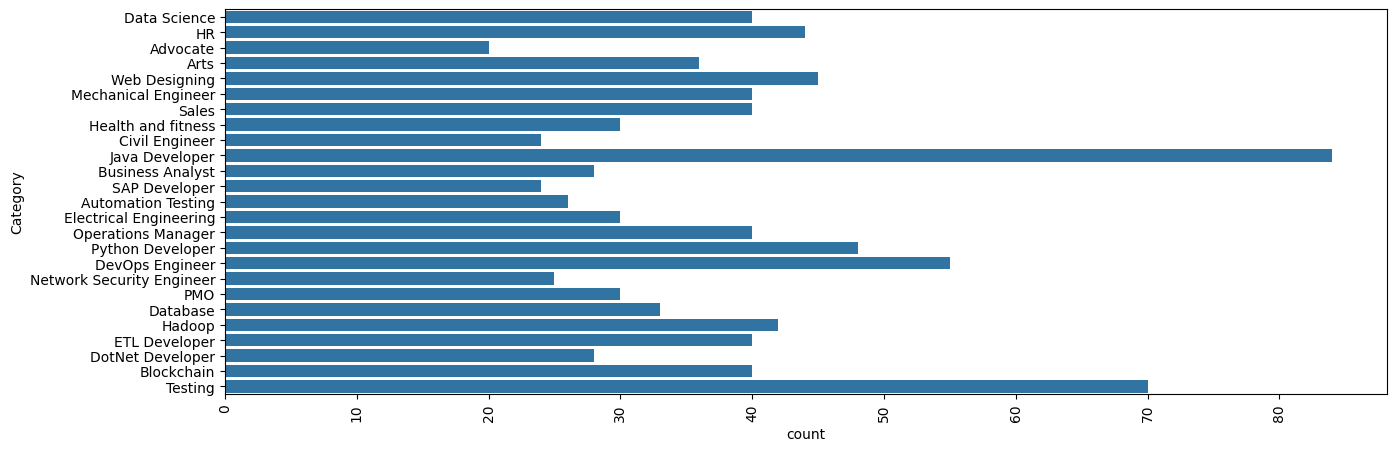

In [3]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

# Cleaning Data

In [4]:
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\]'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\]'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Ary\AppData\Local\Temp\ipykernel_25264\3905212326.py:2: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('http\S+\s', ' ', txt)
C:\Users\Ary\AppData\Local\Temp\ipykernel_25264\3905212326.py:4: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('#\S+\s', ' ', cleanText)
C:\Users\Ary\AppData\Local\Temp\ipykernel_25264\3905212326.py:5: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('@\S+', '  ', cleanText)
C:\Users\Ary\AppData\Local\Temp\ipyk

In [5]:
df['cleanResume'] = df['Resume'].apply(cleanResume)
df

,Category,Resume,cleanResume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


# Label Encoding

In [6]:
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])
df

,Category,Resume,cleanResume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,23,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


# Vactorize feature

In [7]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['cleanResume'])
requredTaxt  = tfidf.transform(df['cleanResume'])

In [8]:
requiredText_df = pd.DataFrame(requredTaxt.toarray(), columns=tfidf.get_feature_names_out())
print(requiredText_df)


     000   01  017   02   03   04  04th   05  050education  06th  ...  zaggle  \
0    0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0           0.0   0.0  ...     0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0           0.0   0.0  ...     0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0           0.0   0.0  ...     0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0           0.0   0.0  ...     0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0           0.0   0.0  ...     0.0   
..   ...  ...  ...  ...  ...  ...   ...  ...           ...   ...  ...     ...   
957  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0           0.0   0.0  ...     0.0   
958  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0           0.0   0.0  ...     0.0   
959  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0           0.0   0.0  ...     0.0   
960  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0           0.0   0.0  ...     0.0   
961  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0           0.0   0.0  ...     0.0   

     zambia   zd  zenoss  z

# Spliting Data

In [9]:
X = requredTaxt
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Cek distribusi kategori di training dan testing
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (673, 7351), Test set size: (289, 7351)


# Oversampling (SMOTE)

C:\Users\Ary\AppData\Local\Temp\ipykernel_25264\3282316156.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='Set2')


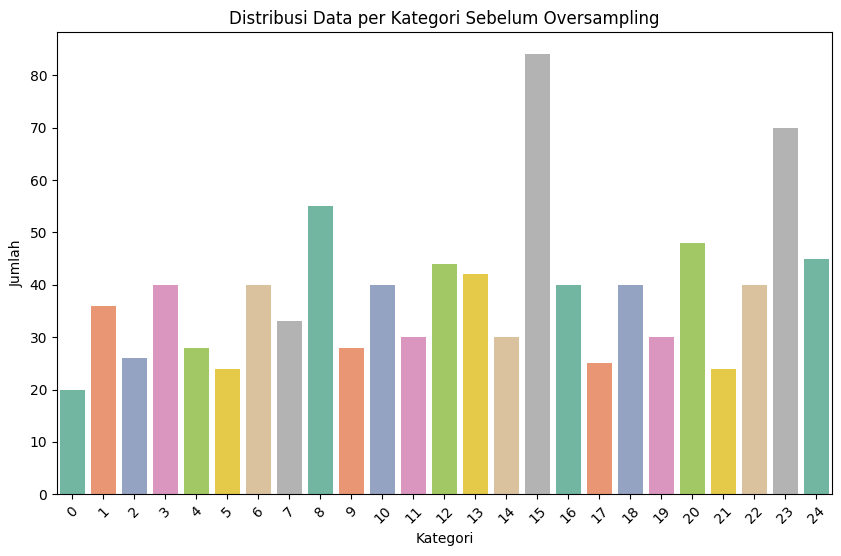

In [10]:
# Misalkan df adalah DataFrame kamu
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df, palette='Set2')

# Menambahkan label dan judul
plt.title('Distribusi Data per Kategori Sebelum Oversampling')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')

# Menampilkan grafik
plt.xticks(rotation=45)  # Jika label kategori panjang, bisa diputar
plt.show()

In [11]:
# Penanganan data tidak seimabngan dengan SMOTE
from imblearn.over_sampling import SMOTE,RandomOverSampler, SMOTENC, SVMSMOTE, ADASYN
from imblearn.combine import SMOTEENN,SMOTETomek
# Oversampling menggunakan SMOTE
oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
print(X_smote.shape)
print(y_smote.shape)

(1450, 7351)
(1450,)


C:\Users\Ary\AppData\Local\Temp\ipykernel_25264\382057517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_smote_series, palette='Set2')


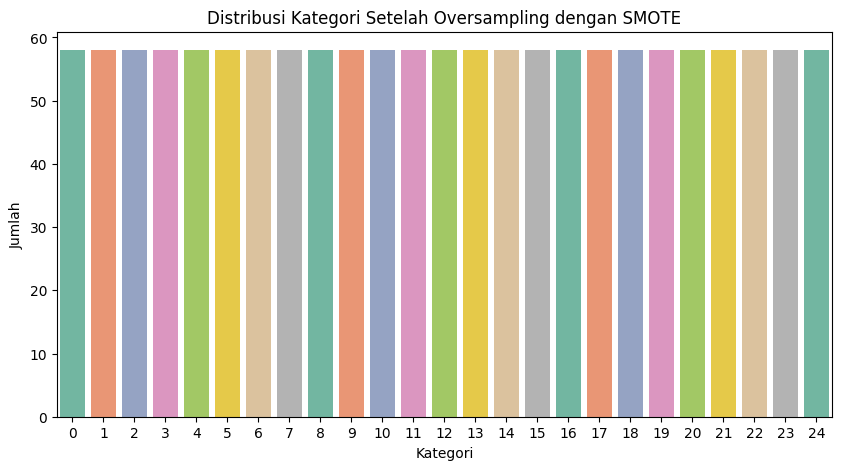

In [12]:
# Convert y_smote menjadi pandas Series
y_smote_series = pd.Series(y_smote)
# Plot distribusi kategori setelah oversampling
plt.figure(figsize=(10, 5))
sns.countplot(x=y_smote_series, palette='Set2')

# Menambahkan judul dan label
plt.title('Distribusi Kategori Setelah Oversampling dengan SMOTE')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()

# Hyperparameter Optimization & Evaluation

# K-Nearest Neighbors

Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00        15
           4       0.91      1.00      0.95        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        10
           8       1.00      0.87      0.93        15
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00  

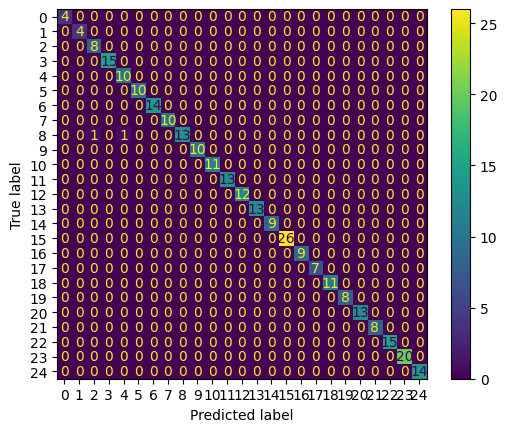

In [13]:
# Hyperparameter Optimization

# Parameter KNN:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV KNN:
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_smote, y_smote)
print("Best parameters for KNN:", grid_search_knn.best_params_)

# Classification Report:
predictions = grid_search_knn.predict(X_test)
print(classification_report(y_test, predictions))

# Confusion Matrix:
cm = confusion_matrix(y_test, predictions, labels=grid_search_knn.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=grid_search_knn.classes_)
disp.plot()

# HPO Random Forest

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        10
           8       1.00      0.93      0.97        15
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00         9
          15

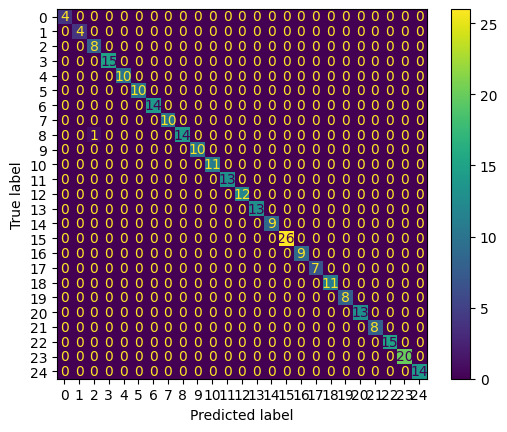

In [14]:
# Hyperparameter Optimization

# Parameter Random Forest:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV Random Forest:
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_smote, y_smote)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

# Classification Report:
predictions = grid_search_rf.predict(X_test)
print(classification_report(y_test, predictions))

# Confusion Matrix:
cm = confusion_matrix(y_test, predictions, labels=grid_search_rf.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=grid_search_rf.classes_)
disp.plot()


# SCV

Best parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        10
           8       1.00      0.87      0.93        15
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00         9
          15       0.96      1.00      0.98        26
         

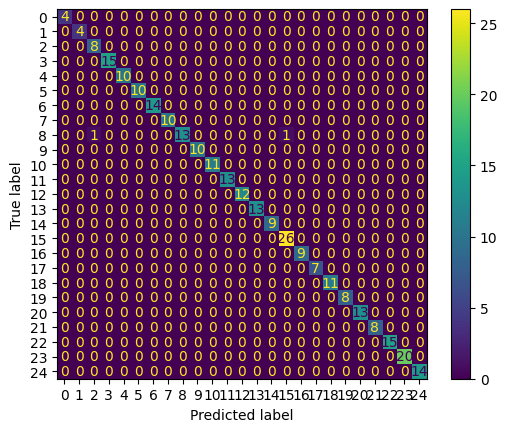

In [15]:
# Hyperparameter Optimization

# Parameter SVC:
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV SVC:
svc = SVC(probability=True, random_state=42)
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_smote, y_smote)
print("Best parameters for SVC:", grid_search_svc.best_params_)

# Classification Report:
predictions = grid_search_svc.predict(X_test)
print(classification_report(y_test, predictions))

# Confusion Matrix:
cm = confusion_matrix(y_test, predictions, labels=grid_search_svc.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=grid_search_svc.classes_)
disp.plot()

# AdaBootsClassifier

c:\Users\Ary\Downloads\Model Screening Resume\Resume-Screening-App-main\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ary\Downloads\Model Screening Resume\Resume-Screening-App-main\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ary\Downloads\Model Screening Resume\Resume-Screening-App-main\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ary\Downloads\Model Screening Resume\Resume-Screening-App-main\.venv\Lib\site-packages\skle

Best parameters for AdaBoost Classifier: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        10
           5       1.00      0.60      0.75        10
           6       0.56      1.00      0.72        14
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        11
          11       1.00      0.38      0.56        13
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00         9
       

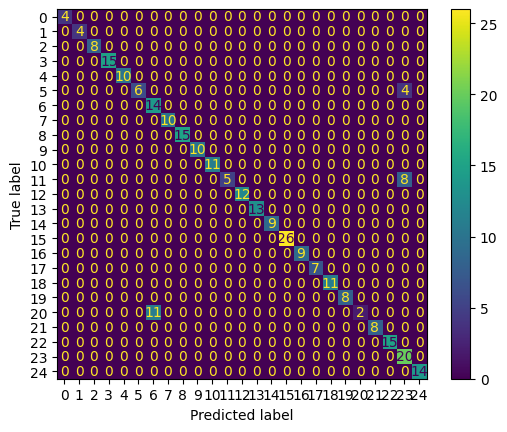

In [16]:
from sklearn.ensemble import AdaBoostClassifier
# Hyperparameter Optimization

# Parameter AdaBoost:
param_grid_ada = {
    'n_estimators':[50, 100, 200],
    'learning_rate':[0.01, 0.1, 1],
    'algorithm':['SAMME', 'SAMME.R'],
    'random_state':[0]
}

# GridSearchABC:
adaBoost = AdaBoostClassifier()
grid_search_ada = GridSearchCV(adaBoost, param_grid_ada, cv=5, scoring='accuracy')
grid_search_ada.fit(X_smote, y_smote)
print("Best parameters for AdaBoost Classifier:", grid_search_ada.best_params_)

# Classification Report:
predictions = grid_search_ada.predict(X_test)
print(classification_report(y_test, predictions))

# Confusion Matrix:
cm = confusion_matrix(y_test, predictions, labels=grid_search_ada.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=grid_search_ada.classes_)
disp.plot()

# GradientBoostingClassifier

Best parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 15}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        10
           8       1.00      0.93      0.97        15
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00  

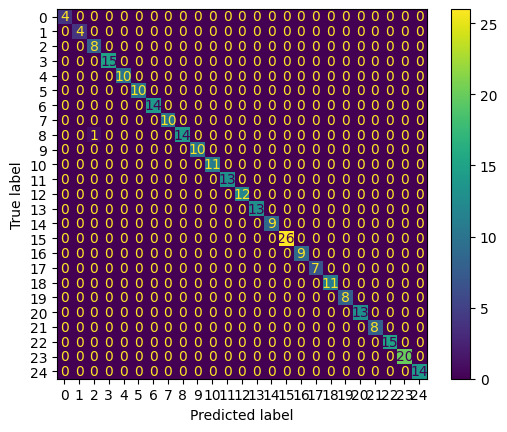

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
# Hyperparameter Optimization

# Parameter Gradient Boosting Classifier:
param_grid_gb = {
    'n_estimators': [5, 10, 15],
    'learning_rate': [0.01, 0.1],  
    'max_depth': [3, 5],            
    'min_samples_split': [2, 5],    
    'min_samples_leaf': [1, 5]   
}

# GridSearchCV for Gradient Boosting Classifier:
gb = GradientBoostingClassifier()
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gb.fit(X_smote, y_smote)
print("Best parameters for GradientBoosting:", grid_search_gb.best_params_)

# Classification Report:
predictions = grid_search_gb.predict(X_test)
print(classification_report(y_test, predictions))

# Confusion Matrix:
cm = confusion_matrix(y_test, predictions, labels=grid_search_gb.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=grid_search_gb.classes_)
disp.plot()

# Stacking CLassifier:

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\Ary\Downloads\Model Screening Resume\Resume-Screening-App-main\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ary\Downloads\Model Screening Resume\Resume-Screening-App-main\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ary\Downloads\Model Screening Resume\Resume-Screening-App-main\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ary\Downloads\Model Screening Resume\Resume-Screening-App-main\.venv\Lib\site-packages\skle

Best parameters for StackingClassifier: {'final_estimator__C': 0.1, 'final_estimator__penalty': 'l2', 'final_estimator__solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        10
           8       1.00      0.93      0.97        15
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00        

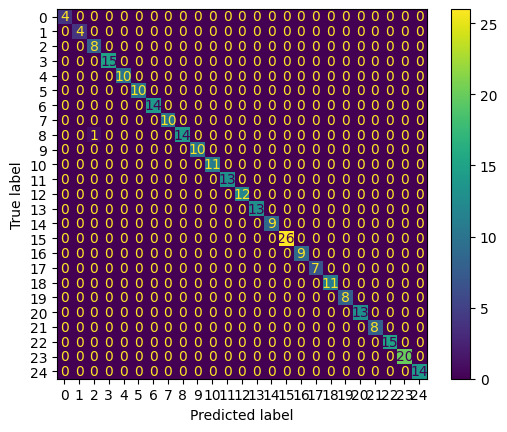

In [19]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
# Hyperparameter Optimization

# Meta model
meta_model = LogisticRegression()

# Definisikan Base learners
base_learners_best = [
    ('knn', grid_search_knn.best_estimator_),
    ('svc', grid_search_svc.best_estimator_),
    ('rf', grid_search_rf.best_estimator_),
    ('ada', grid_search_ada.best_estimator_),
    ('gb', grid_search_gb.best_estimator_)
]

# Buat StackingClassifier dengan base learners dan meta model
stacking_model = StackingClassifier(estimators=base_learners_best, final_estimator=meta_model)

# Parameter StackingClassifier
param_grid_sc ={
    'final_estimator__C': [0.1, 1, 10],
    'final_estimator__penalty': ['l2'],
    'final_estimator__solver': ['lbfgs', 'liblinear']
}

# GridSearchCV for StackingClassifier:
grid_search_sc = GridSearchCV(estimator=stacking_model, param_grid=param_grid_sc, cv=5, n_jobs=-1, verbose=1)
grid_search_sc.fit(X_smote, y_smote)
print("Best parameters for StackingClassifier:", grid_search_sc.best_params_)

# Classification Report
predictions = grid_search_sc.predict(X_test)
print(classification_report(y_test, predictions))

# Confusion Matrix
cm = confusion_matrix(y_test, predictions, labels=grid_search_sc.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=grid_search_sc.classes_)
disp.plot()